In [1]:
import os
import glob
import xml.etree.ElementTree as ET
import cv2

# Example directories for detection and recognition:
# (Adjust these paths to match your folder structure)
car_test_dir = "./test"              # e.g. "./test" contains day_00010.xml and day_00010.jpg
car_val_dir  = "./validation"        # Change as needed
plate_dir    = "./train"      # For recognition, plate images and XML files


ModuleNotFoundError: No module named 'cv2'

In [29]:
def get_image_filename(xml_file):
    """
    Given an xml_file path and the extracted filename from <filename>,
    determine the full path to the corresponding image.
    Uses the XML file's directory as the base.
    """
    base_dir = os.path.dirname(xml_file)  # use the XML file’s directory
    
    candidate = str.split(str.split(xml_file, "/")[-1], ".")[0] + ".jpg"
    print(candidate)
    
    return candidate

In [32]:
def convert_voc_to_yolo_for_detection(xml_dir, target_class="کل ناحیه پلاک"):
    """
    Converts VOC-style XML annotations in xml_dir to YOLO-format text files.
    Only objects with a <name> equal to target_class are used.
    The resulting .txt file is saved in the same directory as the image.
    """
    xml_files = glob.glob(os.path.join(xml_dir, "*.xml"))
    converted_count = 0
    
    for xml_file in xml_files:
        try:
            tree = ET.parse(xml_file)
            root = tree.getroot()
        except Exception as e:
            print(f"Error parsing {xml_file}: {e}")
            continue

        # Extract filename from XML; use helper function if necessary.
        image_filename = get_image_filename(xml_file)
        image_path = os.path.join(xml_dir, image_filename)
        
        # Read the image (without modifying it) to get its dimensions.
        img = cv2.imread(image_path)
        if img is None:
            print(f"Could not read image {image_path}")
            continue
        height, width = img.shape[:2]

        yolo_lines = []
        for obj in root.findall('object'):
            name_node = obj.find('name')
            if name_node is None:
                continue
            name = name_node.text.strip()
            if name != target_class:
                continue
            bndbox = obj.find('bndbox')
            if bndbox is None:
                continue
            try:
                xmin = float(bndbox.find('xmin').text)
                ymin = float(bndbox.find('ymin').text)
                xmax = float(bndbox.find('xmax').text)
                ymax = float(bndbox.find('ymax').text)
            except Exception as e:
                print(f"Error reading bounding box in {xml_file}: {e}")
                continue

            # Convert absolute VOC coordinates to normalized YOLO format
            x_center = ((xmin + xmax) / 2.0) / width
            y_center = ((ymin + ymax) / 2.0) / height
            box_width = (xmax - xmin) / width
            box_height = (ymax - ymin) / height

            # For detection training, assume a single class with index 0.
            yolo_line = f"0 {x_center:.6f} {y_center:.6f} {box_width:.6f} {box_height:.6f}"
            yolo_lines.append(yolo_line)
        
        if yolo_lines:
            base_name = os.path.splitext(image_filename)[0]
            txt_filename = os.path.join(xml_dir, base_name + ".txt")
            with open(txt_filename, "w", encoding="utf-8") as f:
                f.write("\n".join(yolo_lines))
            converted_count += 1
    print(f"Converted {converted_count} XML files in {xml_dir} to YOLO-format annotations.")

# Run conversion for car detection annotations in both directories.
convert_voc_to_yolo_for_detection(car_test_dir, target_class="کل ناحیه پلاک")
convert_voc_to_yolo_for_detection(car_val_dir, target_class="کل ناحیه پلاک")

day_00010.jpg
day_00019.jpg
day_00026.jpg
day_00027.jpg
day_00029.jpg
day_00038.jpg
day_00042.jpg
day_00050.jpg
day_00055.jpg
day_00056.jpg
day_00059.jpg
day_00069.jpg
day_00075.jpg
day_00083.jpg
day_00100.jpg
day_00102.jpg
day_00103.jpg
day_00104.jpg
day_00105.jpg
day_00109.jpg
day_00114.jpg
day_00116.jpg
day_00120.jpg
day_00125.jpg
day_00126.jpg
day_00132.jpg
day_00133.jpg
day_00140.jpg
day_00142.jpg
day_00144.jpg
day_00149.jpg
day_00159.jpg
day_00160.jpg
day_00161.jpg
day_00162.jpg
day_00166.jpg
day_00173.jpg
day_00179.jpg
day_00180.jpg
day_00184.jpg
day_00186.jpg
day_00188.jpg
day_00191.jpg
day_00197.jpg
day_00198.jpg
day_00199.jpg
day_00200.jpg
day_00201.jpg
day_00212.jpg
day_00214.jpg
day_00222.jpg
day_00226.jpg
day_00231.jpg
day_00236.jpg
day_00237.jpg
day_00243.jpg
day_00246.jpg
day_00247.jpg
day_00251.jpg
day_00252.jpg
day_00260.jpg
day_00267.jpg
day_00268.jpg
day_00277.jpg
day_00279.jpg
day_00285.jpg
day_00286.jpg
day_00287.jpg
day_00293.jpg
day_00303.jpg
day_00306.jpg
day_00

KeyboardInterrupt: 

In [33]:
import os, random, shutil

# Define the source directory (used for training) and target test directory.
train_dir = "./test"      # Currently used for detection training
testset_dir = "./testset" # New folder for testing images

# Create the testset directory if it doesn't exist.
if not os.path.exists(testset_dir):
    os.makedirs(testset_dir)

# List all image files in the train_dir (adjust extensions if needed).
image_extensions = ('.jpg', '.jpeg', '.png')
all_images = [f for f in os.listdir(train_dir) if f.lower().endswith(image_extensions)]

# Randomly select 100 images (or all if fewer than 100)
num_test = 100
selected = random.sample(all_images, min(num_test, len(all_images)))

print(f"Selected {len(selected)} images for testing.")

# Move the selected images and their annotation (.txt) files to testset_dir.
for img in selected:
    src_img = os.path.join(train_dir, img)
    dst_img = os.path.join(testset_dir, img)
    shutil.move(src_img, dst_img)
    
    # Also move the corresponding YOLO annotation file if it exists.
    annotation = os.path.splitext(img)[0] + ".txt"
    src_ann = os.path.join(train_dir, annotation)
    if os.path.exists(src_ann):
        dst_ann = os.path.join(testset_dir, annotation)
        shutil.move(src_ann, dst_ann)

Selected 100 images for testing.


In [39]:
dataset_yaml = """
train: /mnt/i/#Repos/plate_detection_sentiment_analysis_neural/test
val: /mnt/i/#Repos/plate_detection_sentiment_analysis_neural/validation
test: /mnt/i/#Repos/plate_detection_sentiment_analysis_neural/testset
nc: 1
names: ['license_plate']
"""

# Save the YAML file.
with open("dataset.yaml", "w", encoding="utf-8") as f:
    f.write(dataset_yaml)

print("dataset.yaml created with the following content:")
print(dataset_yaml)


dataset.yaml created with the following content:

train: /mnt/i/#Repos/plate_detection_sentiment_analysis_neural/test
val: /mnt/i/#Repos/plate_detection_sentiment_analysis_neural/validation
test: /mnt/i/#Repos/plate_detection_sentiment_analysis_neural/testset
nc: 1
names: ['license_plate']



In [3]:
!pip install ultralytics

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 1.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 1.5 MB/s eta 0:00:0000:0100:12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:0000:0100:06
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 1.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 1.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:0000:0100:11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.6 MB/s eta 0:00:0000:0100:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 1.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from ultralytics import YOLO

# Load the most advanced YOLO model variant (YOLOv8x)
model = YOLO("yolov8n.pt")

# Fine-tune the model on your dataset. Adjust epochs, image size, and device as needed.
train_results = model.train(
    data="dataset.yaml",  # the dataset YAML created above
    epochs=50,            # number of training epochs (adjust as needed)
    imgsz=640,            # training image size
    batch=8,
    device="cuda"         # change to "cpu" if GPU is not available
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.78 🚀 Python-3.12.7 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11264MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_d

100%|██████████| 755k/755k [00:00<00:00, 1.01MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /mnt/i/#Repos/plate_detection_sentiment_analysis_neural/test.cache... 4076 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4076/4076 [00:00<?, ?it/s]
val: Scanning /mnt/i/#Repos/plate_detection_sentiment_analysis_neural/validation.cache... 2120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2120/2120 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.28G      1.248      1.644      1.059          4        640: 100%|██████████| 510/510 [02:26<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:48<00:00,  2.72it/s]


                   all       2120       2494      0.926      0.865      0.903      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.16G      1.187     0.9014      1.026          6        640: 100%|██████████| 510/510 [02:07<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:44<00:00,  2.98it/s]

                   all       2120       2494      0.912      0.869      0.906      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.12G      1.136      0.767      1.014          7        640: 100%|██████████| 510/510 [02:12<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:45<00:00,  2.92it/s]

                   all       2120       2494      0.921      0.871      0.922      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.12G      1.125     0.7248      1.007         10        640: 100%|██████████| 510/510 [02:08<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:45<00:00,  2.90it/s]

                   all       2120       2494      0.912       0.88      0.928      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.12G      1.089     0.6935     0.9971          5        640: 100%|██████████| 510/510 [02:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:48<00:00,  2.74it/s]

                   all       2120       2494      0.924      0.887      0.934      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.12G       1.06     0.6654     0.9942          4        640: 100%|██████████| 510/510 [02:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:46<00:00,  2.86it/s]

                   all       2120       2494      0.915      0.879      0.929       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.12G       1.04     0.6397      0.982          6        640: 100%|██████████| 510/510 [02:06<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:43<00:00,  3.03it/s]

                   all       2120       2494      0.928      0.899      0.938       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.12G      1.012     0.6165     0.9738         14        640: 100%|██████████| 510/510 [02:08<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:44<00:00,  3.01it/s]

                   all       2120       2494      0.939        0.9      0.944      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.12G      1.011     0.6036     0.9707          8        640: 100%|██████████| 510/510 [02:09<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:43<00:00,  3.05it/s]

                   all       2120       2494      0.924      0.899      0.942      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.12G     0.9911     0.5988     0.9658          5        640: 100%|██████████| 510/510 [02:10<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:47<00:00,  2.81it/s]

                   all       2120       2494      0.922      0.902      0.943      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.12G     0.9725     0.5829     0.9577          7        640: 100%|██████████| 510/510 [02:09<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:46<00:00,  2.84it/s]

                   all       2120       2494      0.926      0.893      0.943      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.12G     0.9677     0.5715     0.9526          7        640: 100%|██████████| 510/510 [02:07<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:44<00:00,  2.99it/s]

                   all       2120       2494      0.926      0.913       0.95      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.12G     0.9593     0.5705     0.9533         13        640: 100%|██████████| 510/510 [02:08<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:47<00:00,  2.77it/s]

                   all       2120       2494      0.934      0.903      0.951      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.12G     0.9428     0.5531     0.9525          8        640: 100%|██████████| 510/510 [02:05<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:44<00:00,  2.96it/s]

                   all       2120       2494      0.931      0.903       0.95       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.12G     0.9424     0.5506     0.9486          7        640: 100%|██████████| 510/510 [02:05<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:45<00:00,  2.90it/s]

                   all       2120       2494      0.936      0.899      0.951       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.12G     0.9446     0.5482     0.9506          8        640: 100%|██████████| 510/510 [02:06<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:43<00:00,  3.04it/s]

                   all       2120       2494      0.927      0.909      0.955      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.12G     0.9311     0.5353     0.9436          5        640: 100%|██████████| 510/510 [02:09<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:44<00:00,  2.97it/s]

                   all       2120       2494       0.93      0.904      0.953      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.12G     0.9183     0.5269     0.9383          9        640: 100%|██████████| 510/510 [02:08<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:48<00:00,  2.71it/s]

                   all       2120       2494      0.936      0.915      0.955      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.12G     0.9231     0.5353     0.9404          4        640: 100%|██████████| 510/510 [02:07<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:44<00:00,  3.00it/s]

                   all       2120       2494      0.927      0.911      0.952      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.12G     0.9095     0.5172     0.9421         12        640: 100%|██████████| 510/510 [02:11<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:43<00:00,  3.02it/s]

                   all       2120       2494      0.937      0.919      0.957      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.12G     0.9158     0.5322      0.941          9        640: 100%|██████████| 510/510 [02:06<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:44<00:00,  3.00it/s]

                   all       2120       2494      0.916      0.918       0.95      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.12G     0.8955     0.5191      0.932         11        640: 100%|██████████| 510/510 [02:07<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:47<00:00,  2.81it/s]

                   all       2120       2494      0.932      0.912      0.958      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.12G     0.8922     0.5088     0.9381          6        640: 100%|██████████| 510/510 [02:04<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:51<00:00,  2.60it/s]

                   all       2120       2494       0.93      0.907      0.953      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.12G     0.8954      0.507     0.9381          9        640: 100%|██████████| 510/510 [02:06<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:50<00:00,  2.64it/s]

                   all       2120       2494      0.938      0.918      0.957      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.12G     0.8855     0.4998     0.9329         12        640: 100%|██████████| 510/510 [02:04<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:44<00:00,  2.97it/s]

                   all       2120       2494      0.933      0.917      0.958      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.12G     0.8791      0.493     0.9333          7        640: 100%|██████████| 510/510 [02:09<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:47<00:00,  2.81it/s]

                   all       2120       2494      0.931       0.92      0.954      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.12G     0.8769     0.4859     0.9308         11        640: 100%|██████████| 510/510 [02:07<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:50<00:00,  2.64it/s]

                   all       2120       2494      0.937      0.903      0.956      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.12G     0.8633     0.4877     0.9304         10        640: 100%|██████████| 510/510 [02:07<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:48<00:00,  2.75it/s]

                   all       2120       2494      0.932      0.918      0.959      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.12G     0.8614       0.48     0.9239         12        640: 100%|██████████| 510/510 [02:06<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:44<00:00,  2.96it/s]

                   all       2120       2494      0.937      0.906      0.957      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.12G      0.861     0.4832     0.9231          7        640: 100%|██████████| 510/510 [02:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:47<00:00,  2.81it/s]

                   all       2120       2494      0.933      0.918      0.959      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.12G     0.8506     0.4746     0.9146          6        640: 100%|██████████| 510/510 [02:07<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:44<00:00,  2.96it/s]

                   all       2120       2494      0.935      0.916      0.962      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.12G     0.8478     0.4705     0.9206          5        640: 100%|██████████| 510/510 [02:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:47<00:00,  2.79it/s]

                   all       2120       2494      0.932      0.927      0.963      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.12G     0.8423     0.4668     0.9178         10        640: 100%|██████████| 510/510 [02:07<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:46<00:00,  2.83it/s]

                   all       2120       2494      0.939       0.92      0.963      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.12G     0.8366     0.4663     0.9175          4        640: 100%|██████████| 510/510 [02:11<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:45<00:00,  2.94it/s]

                   all       2120       2494      0.943       0.92      0.964      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.12G     0.8277     0.4559     0.9201         12        640: 100%|██████████| 510/510 [02:06<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:45<00:00,  2.91it/s]

                   all       2120       2494      0.935       0.92      0.961      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.12G     0.8166      0.459     0.9158         10        640: 100%|██████████| 510/510 [02:08<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:50<00:00,  2.65it/s]

                   all       2120       2494       0.93      0.925      0.958      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.12G     0.8204     0.4584      0.914          7        640: 100%|██████████| 510/510 [02:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:48<00:00,  2.76it/s]

                   all       2120       2494      0.931      0.929      0.965      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.12G      0.814      0.442     0.9133          6        640: 100%|██████████| 510/510 [02:04<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:45<00:00,  2.92it/s]

                   all       2120       2494      0.933      0.923      0.964      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.12G     0.8121     0.4389     0.9123          8        640: 100%|██████████| 510/510 [02:09<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:45<00:00,  2.94it/s]

                   all       2120       2494      0.929       0.93      0.965      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.12G     0.8096     0.4391     0.9133         12        640: 100%|██████████| 510/510 [02:07<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:44<00:00,  2.96it/s]

                   all       2120       2494      0.939      0.925      0.965      0.749


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.18G     0.7847     0.4117     0.9015          5        640: 100%|██████████| 510/510 [02:11<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:48<00:00,  2.73it/s]

                   all       2120       2494      0.933      0.925      0.963      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.12G     0.7637     0.4052     0.8949          6        640: 100%|██████████| 510/510 [02:05<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:44<00:00,  2.98it/s]

                   all       2120       2494      0.947       0.92      0.966      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.12G     0.7651     0.3994     0.8918          6        640: 100%|██████████| 510/510 [02:07<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:44<00:00,  3.01it/s]

                   all       2120       2494      0.943      0.922      0.969      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.12G      0.754     0.3926     0.8914          5        640: 100%|██████████| 510/510 [02:08<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:47<00:00,  2.78it/s]

                   all       2120       2494      0.941      0.933      0.969      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.12G     0.7477     0.3889     0.8915          4        640: 100%|██████████| 510/510 [02:06<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:46<00:00,  2.87it/s]

                   all       2120       2494      0.944      0.927       0.97      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.12G     0.7452     0.3826     0.8888          4        640: 100%|██████████| 510/510 [02:06<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:44<00:00,  2.97it/s]

                   all       2120       2494      0.935      0.934      0.968      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.12G     0.7307     0.3812     0.8876          6        640: 100%|██████████| 510/510 [02:11<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:48<00:00,  2.72it/s]

                   all       2120       2494      0.936      0.929      0.969      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.12G     0.7298     0.3752     0.8854          6        640: 100%|██████████| 510/510 [02:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:47<00:00,  2.78it/s]

                   all       2120       2494      0.954      0.916      0.969       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.12G     0.7219     0.3715     0.8802          4        640: 100%|██████████| 510/510 [02:05<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:44<00:00,  2.96it/s]

                   all       2120       2494      0.951      0.924      0.971      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.12G     0.7172     0.3639     0.8842          5        640: 100%|██████████| 510/510 [02:09<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:46<00:00,  2.87it/s]

                   all       2120       2494      0.948      0.925      0.971      0.764



50 epochs completed in 2.436 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 6.2MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.12.7 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11264MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 133/133 [00:48<00:00,  2.73it/s]


                   all       2120       2494      0.948      0.924      0.971      0.763
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train7
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fef595467b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033

In [23]:
%matplotlib inline

   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  196.134         1.24760         1.64402         1.05895   
1      2  369.284         1.18746         0.90145         1.02581   
2      3  547.393         1.13574         0.76696         1.01366   
3      4  722.405         1.12471         0.72476         1.00666   
4      5  897.346         1.08893         0.69355         0.99708   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.92573            0.86465           0.90291   
1               0.91163            0.86862           0.90573   
2               0.92093            0.87089           0.92224   
3               0.91156            0.88023           0.92834   
4               0.92369            0.88733           0.93409   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.60326       1.10732       0.86267       0.99139  0.000665   
1              0.60257       1.07378       0

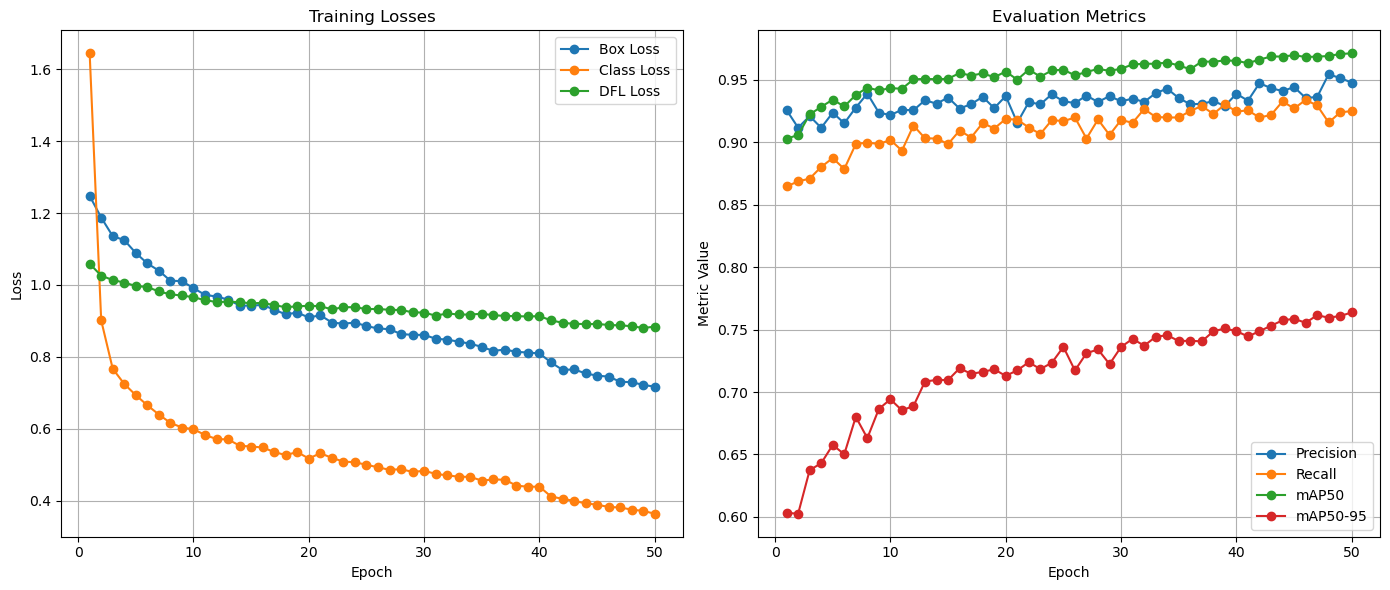

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results CSV file
csv_path = "./runs/detect/train7/results.csv"
df = pd.read_csv(csv_path)

# Print first few rows to verify
print(df.head())

# Create a figure with two subplots: one for training losses and one for evaluation metrics
plt.figure(figsize=(14, 6))

# Subplot 1: Training losses (box_loss, cls_loss, dfl_loss)
plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df['train/box_loss'], label='Box Loss', marker='o')
plt.plot(df['epoch'], df['train/cls_loss'], label='Class Loss', marker='o')
plt.plot(df['epoch'], df['train/dfl_loss'], label='DFL Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses')
plt.legend()
plt.grid(True)

# Subplot 2: Evaluation metrics (precision, recall, mAP50, mAP50-95)
plt.subplot(1, 2, 2)
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision', marker='o')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall', marker='o')
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50', marker='o')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP50-95', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()